In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv
from numpy import matmul as mm
import scipy
from scipy.linalg import lu_factor,lu_solve
from scipy.linalg import cho_factor,cho_solve
from scipy.stats import multivariate_normal

In [2]:
x = np.linspace(-4,2,20)
y = (x+1)**3+10*np.random.normal(0,1,20)

### Posterior and Predictive distribution


### Marginal likelihood (Evidence)

In [3]:
def BayesFitLU(x,y,order=3):
    for i in range(order+1):
        if i == 0:
            Phi = x**i
        else:
            Phi = np.vstack((Phi,x**i))
    Phi = Phi.T
    if order == 0:
        Phi = Phi.reshape(-1,1)
    margcov = mm(Phi,Phi.T)+100*np.eye(Phi.shape[0])
    lu,piv = lu_factor(mm(Phi.T,Phi)+100*np.eye(Phi.shape[1]))
    tmp = lu_solve((lu,piv),Phi.T)
    w = mm(tmp,y)
    f = mm(Phi,w)
    logmarglik = multivariate_normal.logpdf(y,None,margcov)
    
    covlu,covpiv = lu_factor(mm(Phi.T,Phi)/100+np.eye(Phi.shape[1]))
    return f,covlu,covpiv,w,logmarglik

[0.01711863 0.9805512  1.37939377 0.64339359]


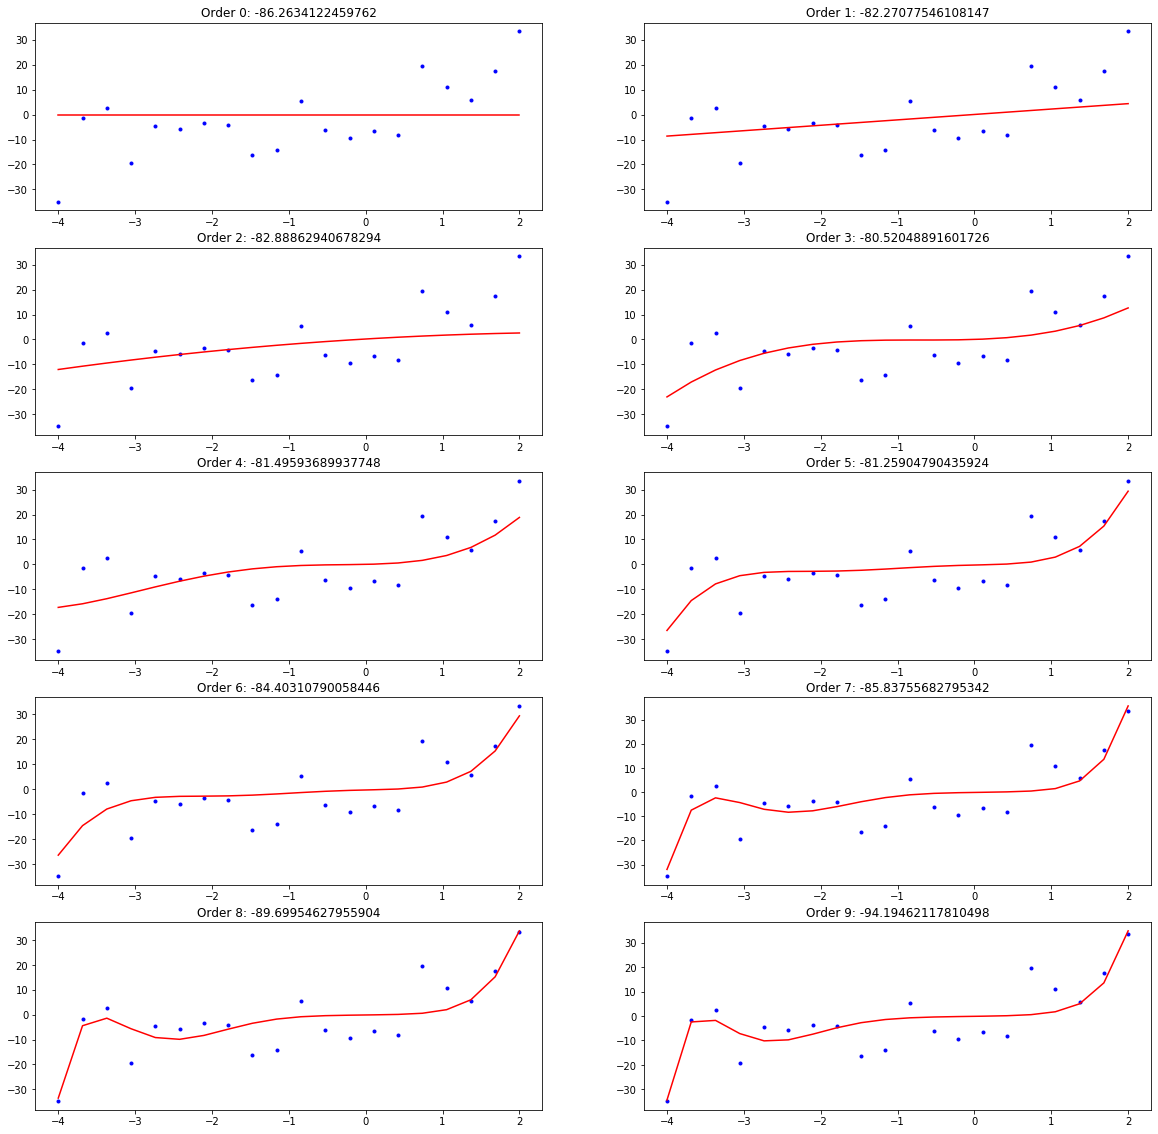

In [4]:
mllistLU = []
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    f,lu,piv,w,lml = BayesFitLU(x,y,i)
    if i == 3:
        print(w)
    mllistLU.append(lml)
    plt.plot(x,y,'b.')
    plt.plot(x,f,'r-')
    plt.title('Order '+str(i)+': '+str(lml))

Text(0.5, 1.0, 'Marginal Evidence')

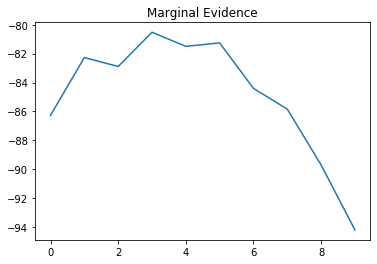

In [5]:
plt.plot(np.arange(10),mllistLU)
plt.title('Log-Marginal Evidence')

In [6]:
def BayesPredictLU(x,mu,lu,piv,order=3):
    for i in range(order+1):
        if i == 0:
            Phi = x**i
        else:
            Phi = np.vstack((Phi,x**i))
    Phi = Phi.T
    if order == 0:
        Phi = Phi.reshape(-1,1)
    tmu = mm(Phi,mu)
    tcov = mm(Phi,lu_solve((lu,piv),Phi.T))+100*np.eye(Phi.shape[0])
    return tmu,tcov

In [7]:
mu,lu,piv,w,lml = BayesFitLU(x,y,3)
xt = np.linspace(-6,4,100)
ytmu,ytcov = BayesPredictLU(xt,w,lu,piv,3)

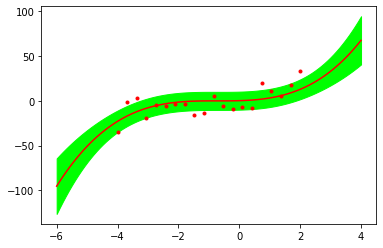

In [10]:
unc = np.sqrt(np.diag(ytcov))
plt.fill_between(xt,ytmu-unc,ytmu+unc,color='lime')
plt.plot(xt,ytmu,'r-')
plt.plot(x,y,'r.')

### Summary

Text(0.5, 1.0, 'Order 3 log-evidence: -80.52048891601726')

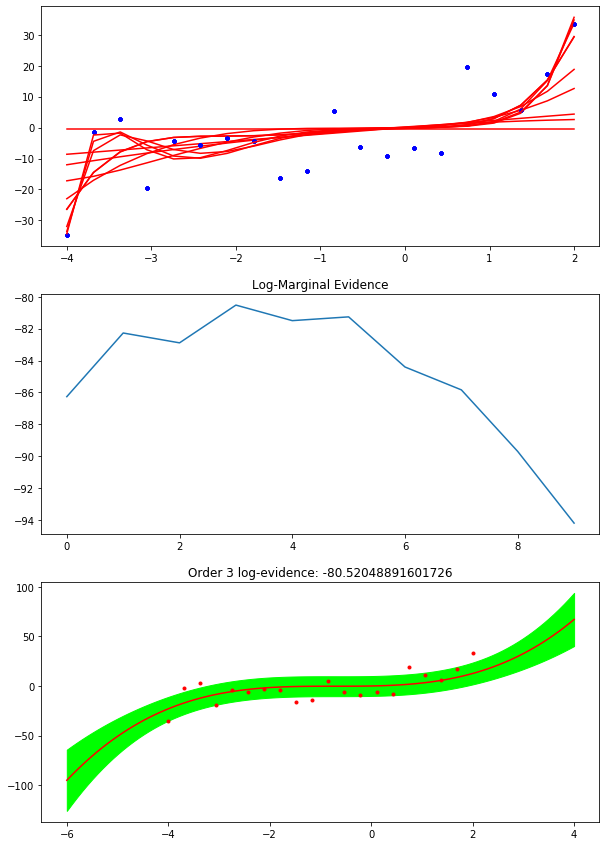

In [19]:
mllistLU = []
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
for i in range(10):
    f,lu,piv,w,lml = BayesFitLU(x,y,i)
    mllistLU.append(lml)
    plt.plot(x,y,'b.')
    plt.plot(x,f,'r-')

plt.subplot(3,1,2)
plt.plot(np.arange(10),mllistLU)
plt.title('Log-Marginal Evidence')

mu,lu,piv,w,lml = BayesFitLU(x,y,3)
xt = np.linspace(-6,4,100)
ytmu,ytcov = BayesPredictLU(xt,w,lu,piv,3)
plt.subplot(3,1,3)
unc = np.sqrt(np.diag(ytcov))
plt.fill_between(xt,ytmu-unc,ytmu+unc,color='lime')
plt.plot(xt,ytmu,'r-')
plt.plot(x,y,'r.')
plt.title('Order 3 log-evidence: '+str(lml))